In [ ]:
import pandas as pd
data = pd.read_csv('student_depression_dataset.csv')
data.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve

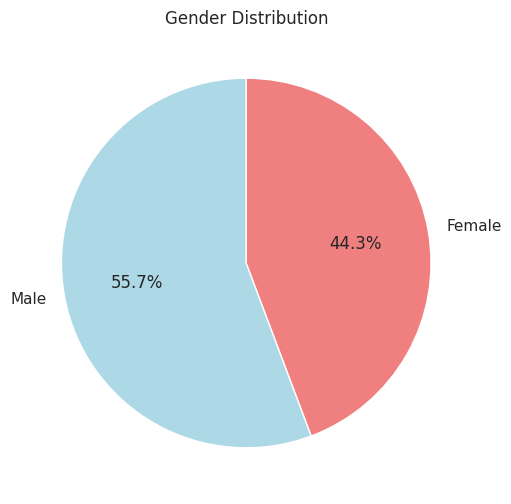

In [ ]:


# Set the style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()



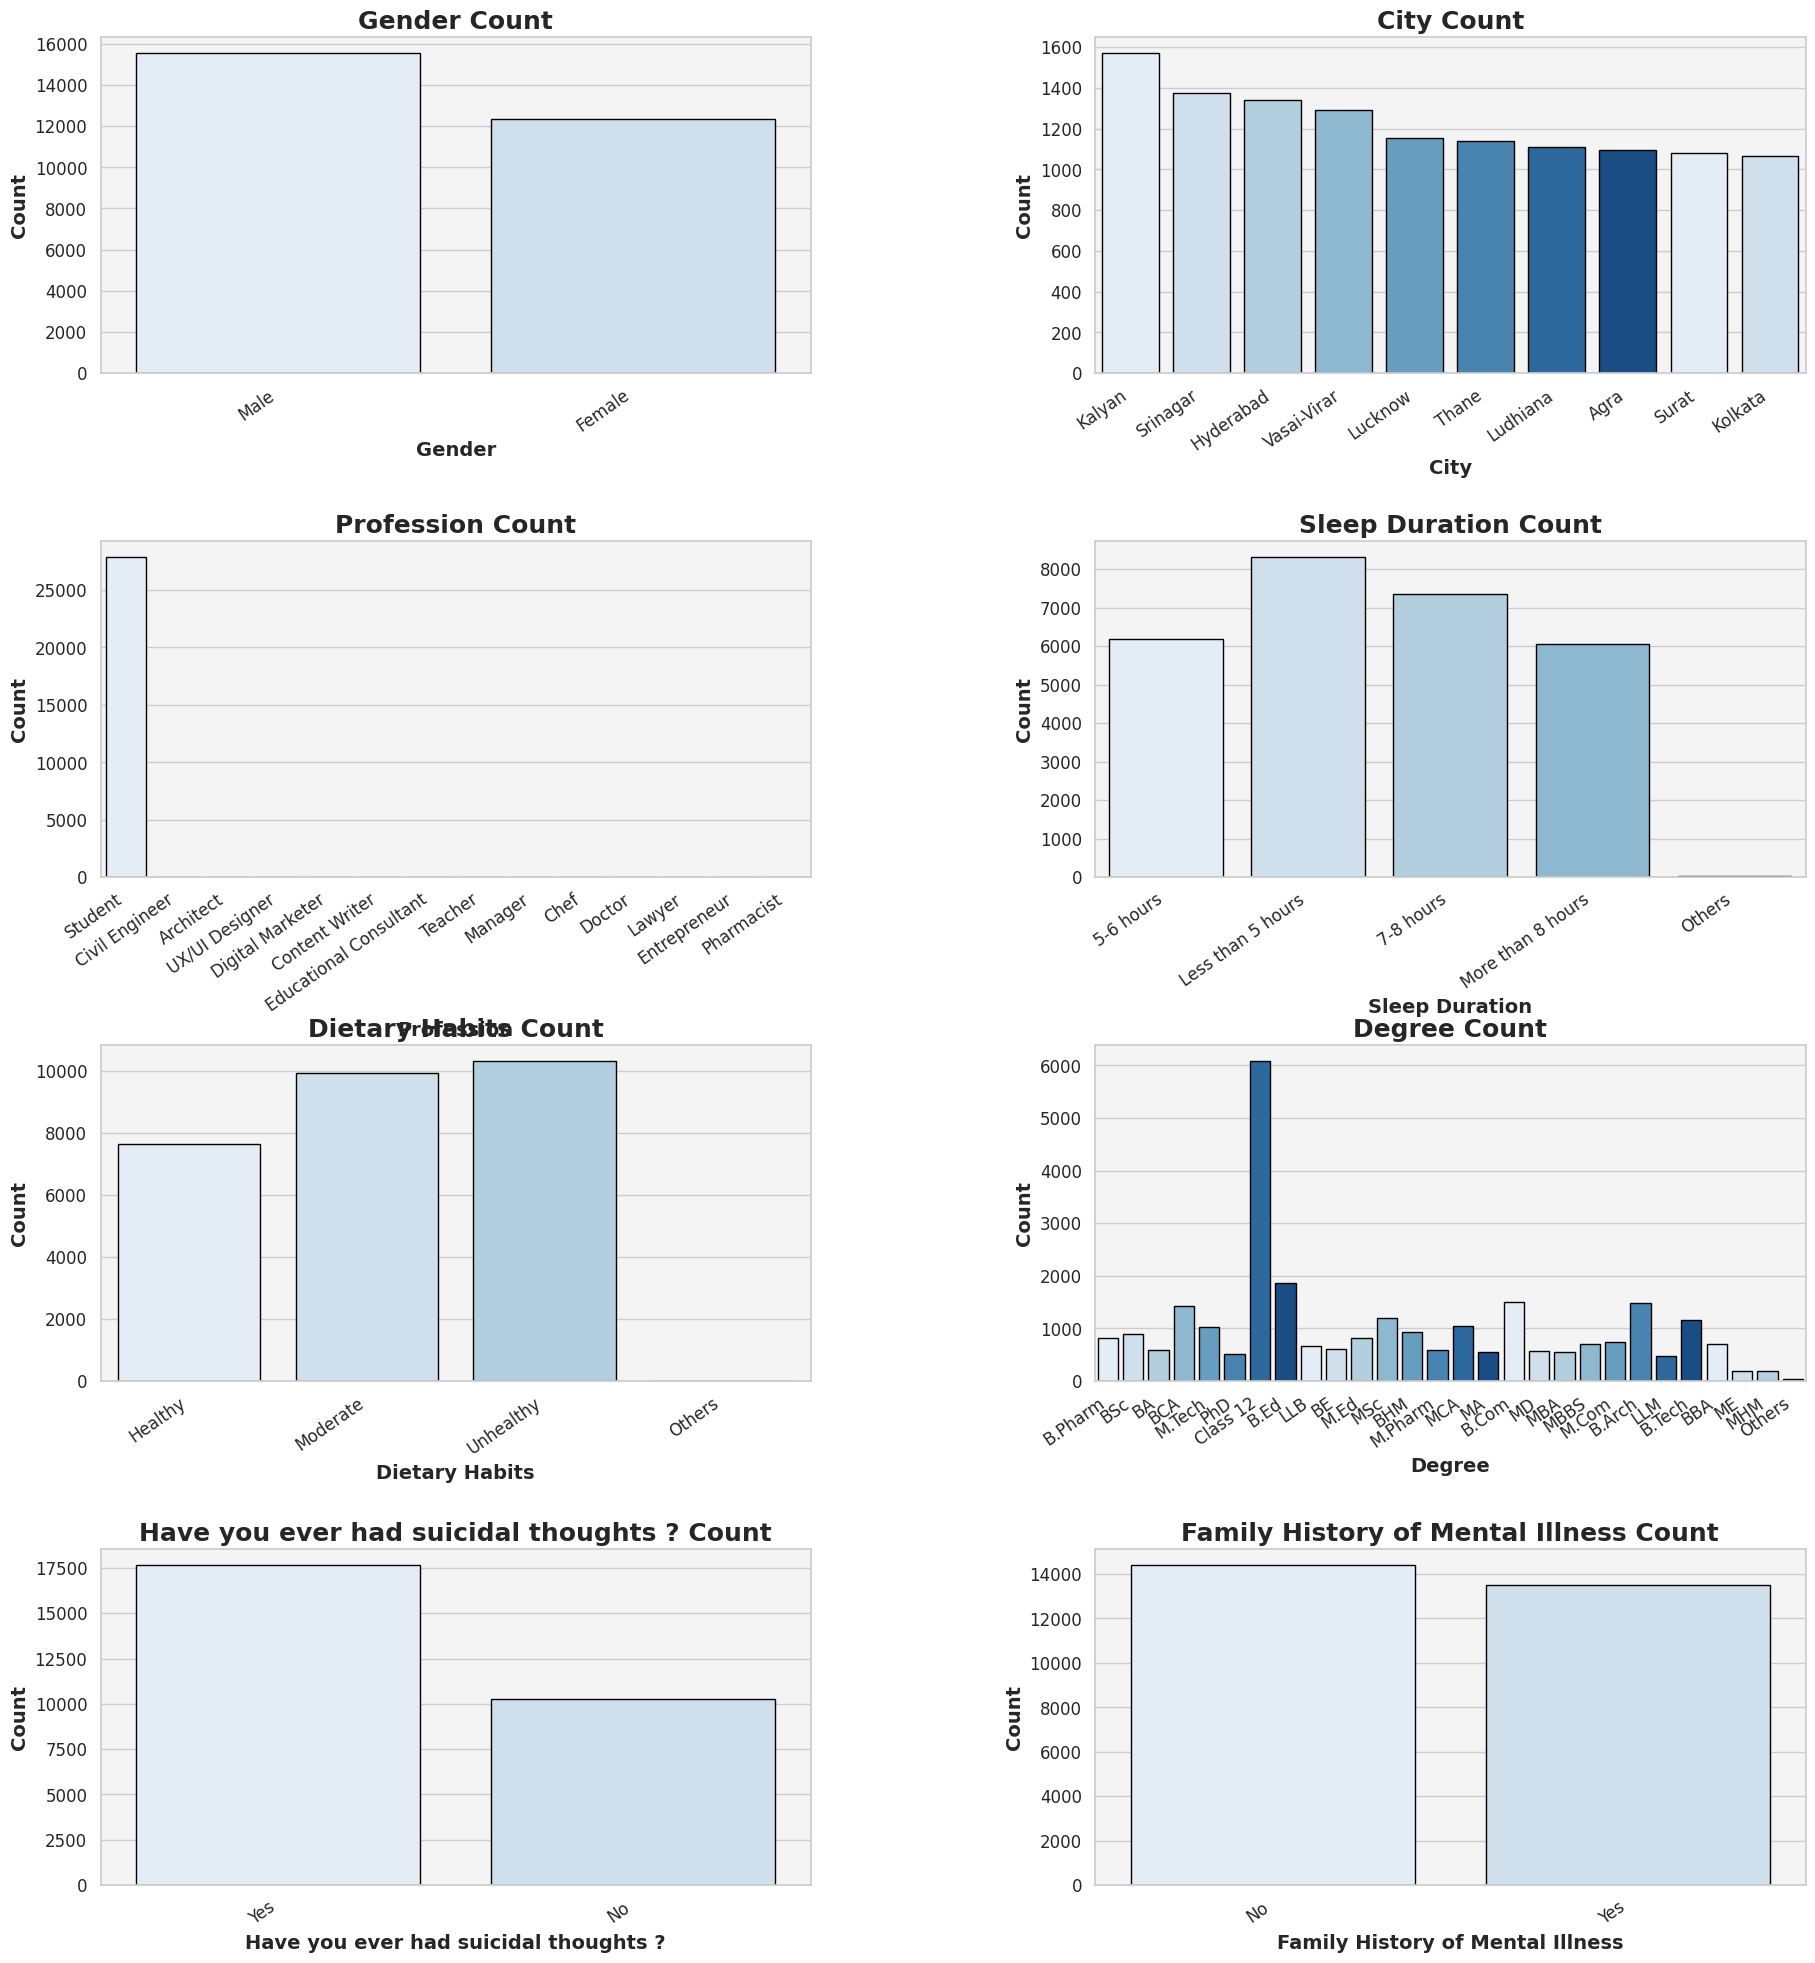

In [ ]:
warnings.filterwarnings("ignore")

# Get categorical columns and exclude 'id'
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

# Set a seaborn style for the plot
sns.set(style="whitegrid")

# Determine rows and columns for the subplot grid
num_cols = 2  # Two plots per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

# Create figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Use a visually balanced color palette
colors = sns.color_palette("Blues", n_colors=8)

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    # Increase the size of the "City" plot for better readability
    if col.lower() == 'city':
        sns.countplot(data=data, x=col, ax=axes[i], palette=colors, order=data[col].value_counts().iloc[:10].index)  # Top 10 cities only
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    else:
        sns.countplot(data=data, x=col, ax=axes[i], palette=colors)
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')

    # Set labels
    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')

    # Rotate x-axis labels for readability
    axes[i].tick_params(axis='x', rotation=35, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    # Align x-axis labels horizontally to avoid overlap
    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')

    # Set bar edge color
    for bar in axes[i].patches:
        bar.set_edgecolor('black')

    # Set a soft gray background for subplot
    axes[i].set_facecolor('#f4f4f4')

# Remove unused axes if any
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Show the plot
plt.show()

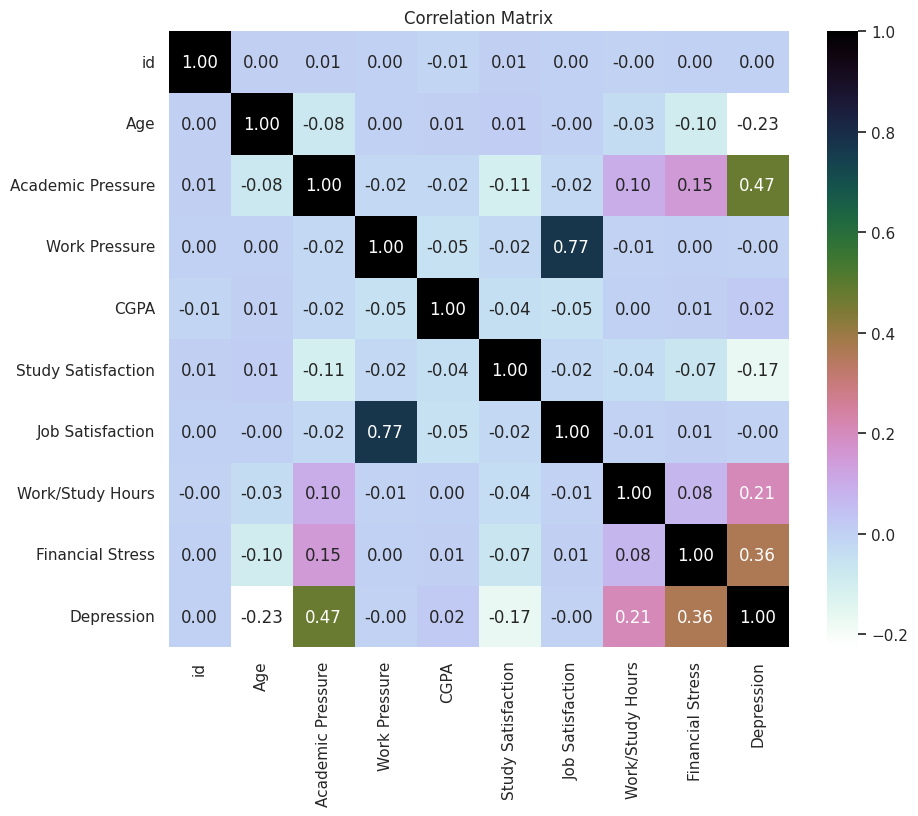

In [ ]:
#  Correlation Analysis (only numerical columns)
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
correlation_matrix = numerical_data.corr()  # Calculate the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix_r', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

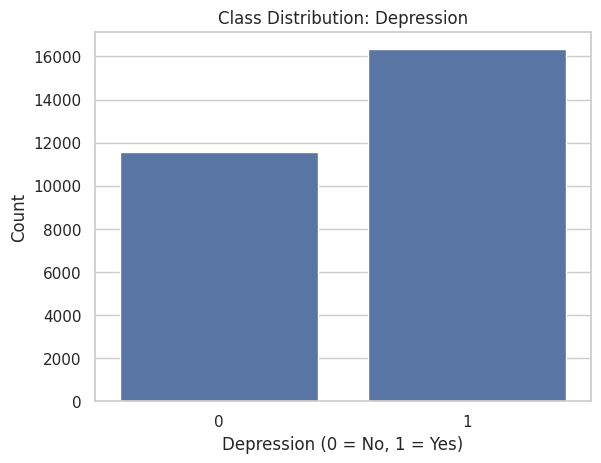

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Depression', data=df)
plt.title('Class Distribution: Depression')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


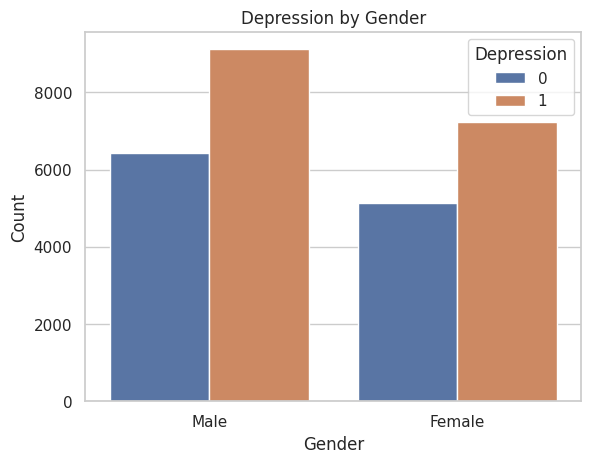

In [ ]:
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Depression by Gender')
plt.ylabel('Count')
plt.show()


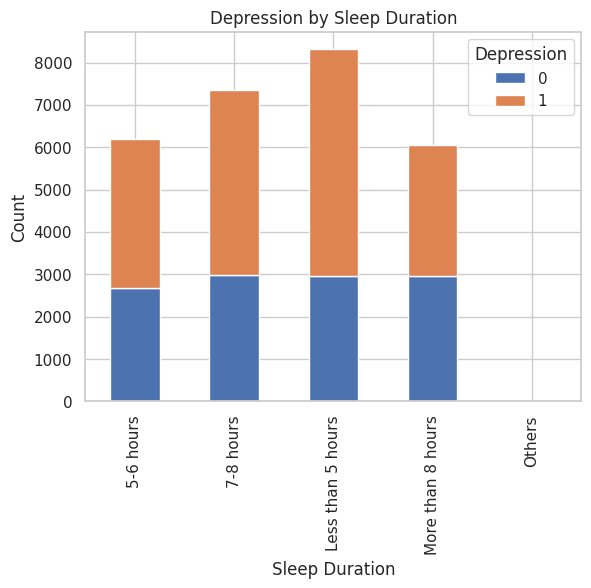

In [ ]:
sleep_counts = df.groupby(['SleepDuration', 'Depression']).size().unstack()
sleep_counts.plot(kind='bar', stacked=True)
plt.title('Depression by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.show()


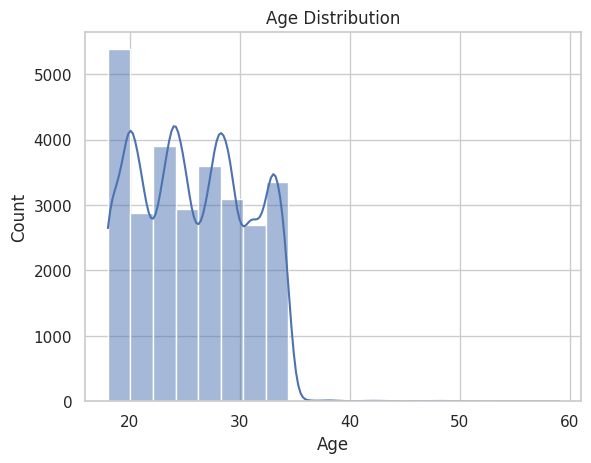

In [ ]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


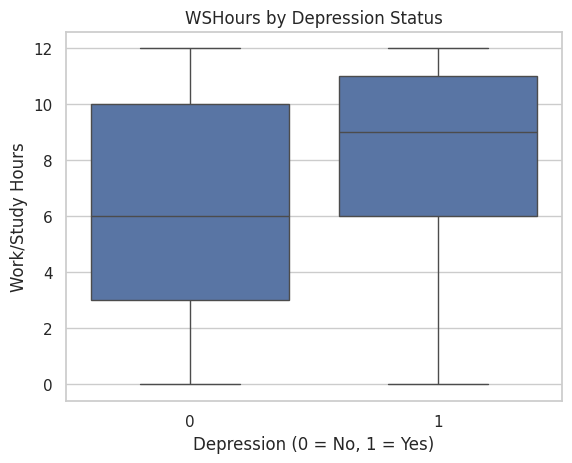

In [ ]:
sns.boxplot(x='Depression', y='WSHours', data=df)
plt.title('WSHours by Depression Status')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Work/Study Hours')
plt.show()


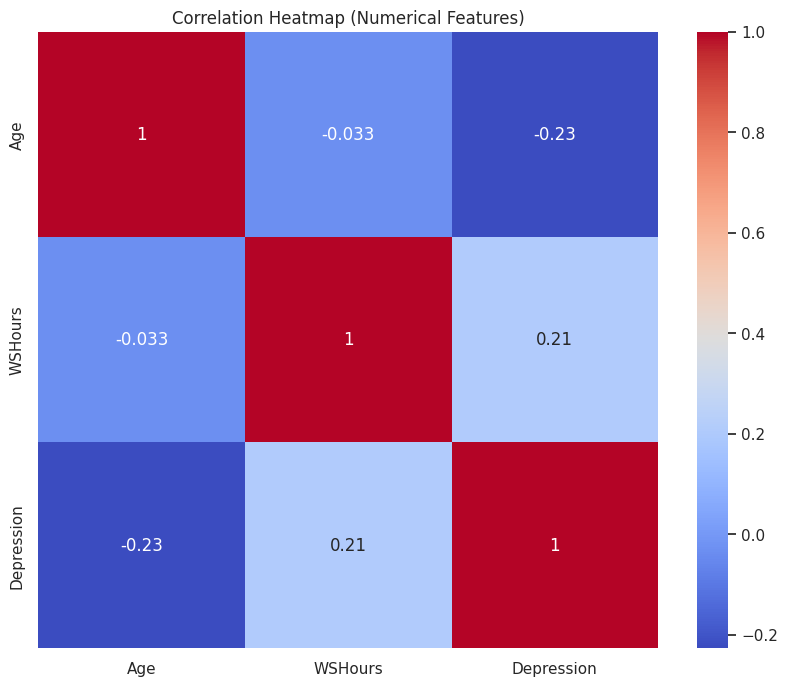

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[quantiVars + ['Depression']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

# Load and clean data
df = pd.read_csv("student_depression_dataset.csv")

# Rename columns
df = df.rename(columns={
    'Academic Pressure': 'AcademicPressure',
    'Work Pressure': 'WorkPressure',
    'Study Satisfaction': 'StudySatisfaction',
    'Job Satisfaction': 'JobSatisfaction',
    'Sleep Duration': 'SleepDuration',
    'Dietary Habits': 'DietaryHabits',
    'Have you ever had suicidal thoughts ?': 'SuicidalThoughts',
    'Work/Study Hours': 'WSHours',
    'Financial Stress': 'FinancialStress',
    'Family History of Mental Illness': 'FamilyHistory'
})

# Drop irrelevant columns
df = df.drop(columns=['id', 'City', 'Degree', 'Profession', 'CGPA'])

# Split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
y_train = train_data['Depression'].values
y_test = test_data['Depression'].values

qualiVars = ['Gender', 'SleepDuration', 'DietaryHabits', 'SuicidalThoughts', 'FamilyHistory',
             'WorkPressure', 'AcademicPressure', 'StudySatisfaction', 'JobSatisfaction', 'FinancialStress']
quantiVars = [ 'Age', 'WSHours']

# === Manual Imputation and Standardization ===

# 1. Impute with median and compute mean/std manually
means, stds = {}, {}

def standardize_manual(col_data, col_name):
    median = np.nanmedian(col_data)
    col_data = np.where(np.isnan(col_data), median, col_data)  # Fill NaNs
    mean = np.mean(col_data)
    std = np.std(col_data)
    means[col_name] = mean
    stds[col_name] = std
    return (col_data - mean) / std

# Apply manual standardization
X_train_quanti = np.column_stack([
    standardize_manual(train_data[col].values, col) for col in quantiVars
])
X_test_quanti = np.column_stack([
    (np.where(np.isnan(test_data[col]), np.nanmedian(train_data[col]), test_data[col]) - means[col]) / stds[col]
    for col in quantiVars
])

# === One-Hot Encode Categorical Features ===
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_quali = encoder.fit_transform(train_data[qualiVars])
X_test_quali = encoder.transform(test_data[qualiVars])

# === Combine Final Features ===
X_train_final = np.hstack((X_train_quanti, X_train_quali))
X_test_final = np.hstack((X_test_quanti, X_test_quali))

# === Linear Regression from Scratch ===
class ScratchLinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias
        self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

    def evaluate(self, y_true, y_pred):
        acc = accuracy_score(y_true, np.round(y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return acc, mae, r2

# === Train and Evaluate ===
model = ScratchLinearRegression()
model.fit(X_train_final, y_train)

# Predictions
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

# Metrics
train_acc, train_mae, train_r2 = model.evaluate(y_train, y_train_pred)
test_acc, test_mae, test_r2 = model.evaluate(y_test, y_test_pred)

print(f"Train: Accuracy={train_acc:.2f}, MAE={train_mae:.2f}, R²={train_r2:.2f}")
print(f"Test:  Accuracy={test_acc:.2f}, MAE={test_mae:.2f}, R²={test_r2:.2f}")



import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

class ScratchSVM:
    def __init__(self, learning_rate=0.01, regularization_param=0.1, max_iters=1000):
        self.learning_rate = learning_rate
        self.regularization_param = regularization_param
        self.max_iters = max_iters
        self.w = None  # Weights (coefficients)
        self.b = None  # Bias term

    def hinge_loss(self, X, y):
        # Hinge loss for linear SVM
        margin = y * (np.dot(X, self.w) + self.b)
        loss = np.mean(np.maximum(0, 1 - margin))  # Hinge loss (with margin)
        return loss

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for i in range(self.max_iters):
            margins = y * (np.dot(X, self.w) + self.b)

            # Compute gradients manually
            dw = np.zeros_like(self.w)
            db = 0

            for j in range(n_samples):
                if margins[j] < 1:  # If the sample is either misclassified or within the margin
                    dw -= y[j] * X[j]
                    db -= y[j]

            # Add regularization term to the gradient
            dw += 2 * self.regularization_param * self.w

            # Update weights and bias
            self.w -= self.learning_rate * dw / n_samples
            self.b -= self.learning_rate * db / n_samples

            # === Print Loss Every 100 Iterations ===
            if i % 100 == 0 or i == self.max_iters - 1:
                loss = self.hinge_loss(X, y)
                print(f"Iteration {i}, Hinge Loss: {loss:.4f}")

    def predict(self, X):
        # Prediction rule
        return np.sign(np.dot(X, self.w) + self.b)

    def evaluate(self, y_true, y_pred):
        # Evaluate model performance
        acc = accuracy_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return acc, mae, r2

# === Train and Evaluate the ScratchSVM Model ===

svm_model_scratch = ScratchSVM(learning_rate=0.01, regularization_param=0.1, max_iters=1000)
svm_model_scratch.fit(X_train_final, y_train)

# Predictions
y_train_pred_svm_scratch = svm_model_scratch.predict(X_train_final)
y_test_pred_svm_scratch = svm_model_scratch.predict(X_test_final)

# Metrics
train_acc_svm, train_mae_svm, train_r2_svm = svm_model_scratch.evaluate(y_train, y_train_pred_svm_scratch)
test_acc_svm, test_mae_svm, test_r2_svm = svm_model_scratch.evaluate(y_test, y_test_pred_svm_scratch)

print(f"SVM Scratch Train: Accuracy={train_acc_svm:.2f}, MAE={train_mae_svm:.2f}, R²={train_r2_svm:.2f}")
print(f"SVM Scratch Test:  Accuracy={test_acc_svm:.2f}, MAE={test_mae_svm:.2f}, R²={test_r2_svm:.2f}")


import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

class ScratchLogisticRegression:
    def __init__(self, learning_rate=0.01, regularization_param=0.1, max_iters=1000):
        self.learning_rate = learning_rate
        self.regularization_param = regularization_param
        self.max_iters = max_iters
        self.theta = None  # Weights (coefficients)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  # Sigmoid function

    def loss(self, X, y):
        m = len(y)
        predictions = self.sigmoid(np.dot(X, self.theta))
        # Compute binary cross-entropy loss with regularization
        return -1/m * (np.dot(y, np.log(predictions)) + np.dot((1 - y), np.log(1 - predictions))) + \
               (self.regularization_param / (2 * m)) * np.sum(self.theta[1:] ** 2)

    def fit(self, X, y):
        # Initialize weights
        n_samples, n_features = X.shape
        self.theta = np.zeros(n_features)

        # Gradient descent
        for i in range(self.max_iters):
            predictions = self.sigmoid(np.dot(X, self.theta))
            errors = predictions - y

            # Compute gradients
            gradient = np.dot(X.T, errors) / n_samples
            regularization_gradient = (self.regularization_param / n_samples) * np.r_[[0], self.theta[1:]]
            gradient += regularization_gradient

            # Update weights
            self.theta -= self.learning_rate * gradient

            # Optionally, you can print the loss to monitor convergence
            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {self.loss(X, y):.4f}")

    def predict(self, X):
        predictions = self.sigmoid(np.dot(X, self.theta))
        return np.round(predictions)  # Return binary predictions (0 or 1)

    def evaluate(self, y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return acc, mae, r2

# === Train and Evaluate the Scratch Logistic Regression Model ===

logreg_model_scratch = ScratchLogisticRegression(learning_rate=0.01, regularization_param=0.1, max_iters=1000)
logreg_model_scratch.fit(X_train_final, y_train)

# Predictions
y_train_pred_logreg_scratch = logreg_model_scratch.predict(X_train_final)
y_test_pred_logreg_scratch = logreg_model_scratch.predict(X_test_final)

# Metrics
train_acc_logreg, train_mae_logreg, train_r2_logreg = logreg_model_scratch.evaluate(y_train, y_train_pred_logreg_scratch)
test_acc_logreg, test_mae_logreg, test_r2_logreg = logreg_model_scratch.evaluate(y_test, y_test_pred_logreg_scratch)

print(f"Logistic Regression Scratch Train: Accuracy={train_acc_logreg:.2f}, MAE={train_mae_logreg:.2f}, R²={train_r2_logreg:.2f}")
print(f"Logistic Regression Scratch Test:  Accuracy={test_acc_logreg:.2f}, MAE={test_mae_logreg:.2f}, R²={test_r2_logreg:.2f}")


Train: Accuracy=0.85, MAE=0.26, R²=0.52
Test:  Accuracy=0.84, MAE=0.27, R²=0.50
Iteration 0, Hinge Loss: 0.9788
Iteration 100, Hinge Loss: 0.4133
Iteration 200, Hinge Loss: 0.4132
Iteration 300, Hinge Loss: 0.4132
Iteration 400, Hinge Loss: 0.4132
Iteration 500, Hinge Loss: 0.4132
Iteration 600, Hinge Loss: 0.4132
Iteration 700, Hinge Loss: 0.4132
Iteration 800, Hinge Loss: 0.4132
Iteration 900, Hinge Loss: 0.4132
Iteration 999, Hinge Loss: 0.4132
SVM Scratch Train: Accuracy=0.59, MAE=0.41, R²=-0.70
SVM Scratch Test:  Accuracy=0.58, MAE=0.42, R²=-0.72
Iteration 0, Loss: 0.6919
Iteration 100, Loss: 0.6099
Iteration 200, Loss: 0.5624
Iteration 300, Loss: 0.5287
Iteration 400, Loss: 0.5032
Iteration 500, Loss: 0.4833
Iteration 600, Loss: 0.4674
Iteration 700, Loss: 0.4544
Iteration 800, Loss: 0.4436
Iteration 900, Loss: 0.4345
Logistic Regression Scratch Train: Accuracy=0.83, MAE=0.17, R²=0.31
Logistic Regression Scratch Test:  Accuracy=0.82, MAE=0.18, R²=0.25
